# Pylops - visualizing linear operators

### Author: M.Ravasi

The aim of this notebook is to use the `dense()` method of the `LinearOperator` class and display the equivalent dense matrix representation of PyLops operators.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import pylops

from scipy.sparse import csr_matrix, vstack, rand
from scipy.linalg import lstsq, solve, pinv
from scipy.sparse.linalg import LinearOperator as spLinearOperator
from scipy.sparse.linalg import cg, lsqr

from pylops.utils                      import dottest
from pylops.utils.wavelets             import *
from pylops.utils.seismicevents        import *
from pylops.basicoperators             import *
from pylops.signalprocessing             import *
from pylops.waveeqprocessing.mdd       import *
from pylops.optimization.leastsquares  import *
from pylops.optimization.sparsity  import IRLS as IRLSpylops
from pylops.optimization.sparsity  import FISTA, SPGL1

### MatrixMult

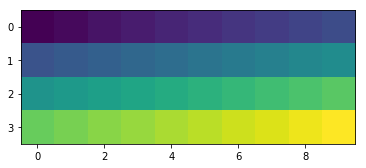

In [2]:
Mop = MatrixMult(np.arange(40).reshape(4, 10))
M = Mop.dense()

plt.figure()
plt.imshow(M)

### Identity

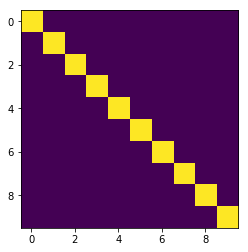

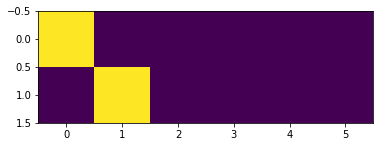

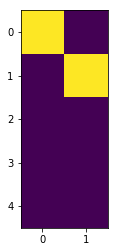

In [3]:
Iop = Identity(10)
I = Iop.dense()
plt.figure()
plt.imshow(I)

Iop = Identity(2, 6)
I = Iop.dense()
plt.figure()
plt.imshow(I)

Iop = Identity(5, 2, inplace=True)
I = Iop.dense()
plt.figure()
plt.imshow(I);

### Zero

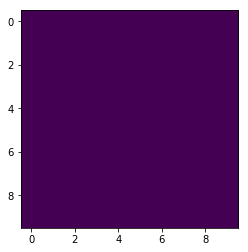

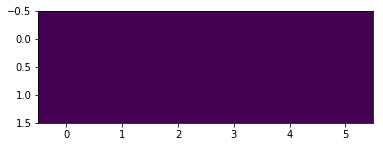

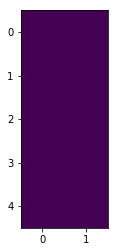

In [4]:
Zop = Zero(10)
Z = Zop.dense()
plt.figure()
plt.imshow(Z)

Zop = Zero(2, 6)
Z = Zop.dense()
plt.figure()
plt.imshow(Z)

Zop = Zero(5, 2)
Z = Zop.dense()
plt.figure()
plt.imshow(Z);

### Diagonal

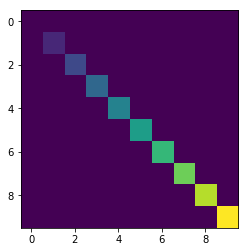

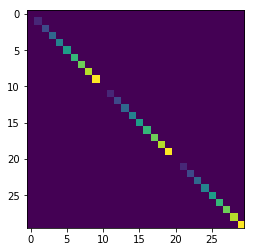

In [5]:
Dop = Diagonal(np.arange(10))
D = Dop.dense()

plt.figure()
plt.imshow(D);


Dop = Diagonal(np.arange(10), dims=(3, 10), dir=1)
D = Dop.dense()

plt.figure()
plt.imshow(D);

### Transpose

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 3 6]
 [1 4 7]
 [2 5 8]]


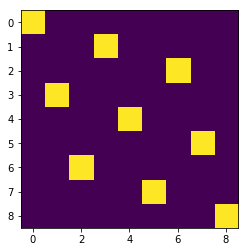

In [6]:
Top = Transpose((3, 3), (1, 0))
T = Top.dense()

plt.figure()
plt.imshow(T);

x = np.arange(9).reshape(3, 3)
y = Top * x.ravel()
print(x)
print(y.reshape(3, 3))

### Flip

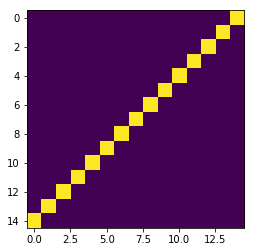

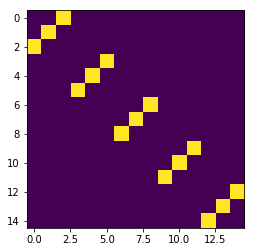

In [7]:
Fop = Flip(15)
F = Fop.dense()

plt.figure()
plt.imshow(F)

Fop = Flip(15, (5, 3), dir=1)
F = Fop.dense()

plt.figure()
plt.imshow(F);

### Roll

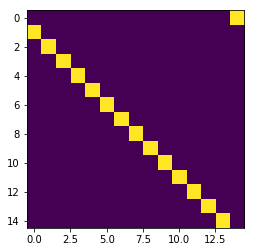

In [8]:
Rop = Roll(15)
R = Rop.dense()

plt.figure()
plt.imshow(R);

### Pad

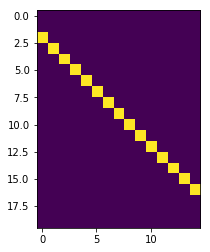

In [27]:
Pop = Pad(15, (2, 3))
P = Pop.dense()

plt.figure()
plt.imshow(P)

### Sum

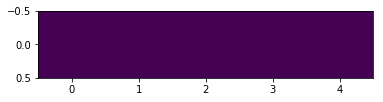

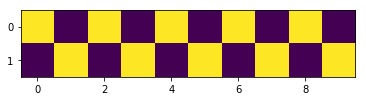

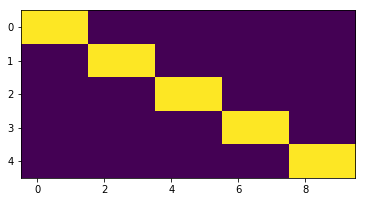

In [66]:
Sop = Sum((5, ), dir=0)
S = Sop.dense()
plt.figure()
plt.imshow(S);

Sop = Sum((5, 2), dir=0)
S = Sop.dense()
plt.figure()
plt.imshow(S);

Sop = Sum((5, 2), dir=1)
S = Sop.dense()
plt.figure()
plt.imshow(S);

### FFT

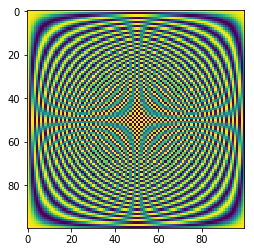

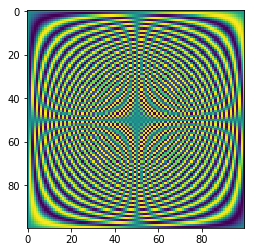

In [68]:
Fop = FFT(100, nfft=100)
F = Fop.dense()
plt.figure()
plt.imshow(np.real(F))
plt.figure()
plt.imshow(np.imag(F));